In [2]:
%load_ext autoreload
%autoreload 2
!hostname
!date

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
bipc33.informatik.uni-freiburg.de
Sun Jun 28 21:16:30 CEST 2015


In [3]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)

In [5]:
'''
DISK SAMPLING MK2
'''
%time
import os
os.nice(19)
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge
import graphlearn.trial_samplers.discsampler as ds
from graphlearn.utils import draw
disc = ds.DiscSampler()

# learn a grammar
training_size=1000
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
pos = itertools.islice(training_graphs,training_size)
training_graphs2 = gspan_to_eden( 'bursi.neg.gspan' )
neg = itertools.islice(training_graphs2,training_size)

gr=disc.sample_graphs(pos,neg, radius=.2, how_many= 100, check_k=30)
#gr=disc.sample_simple(pos,neg)
draw.draw_graph_set_graphlearn(gr) 


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs

Classifier:
SGDClassifier(alpha=7.76217418025e-05, average=False, class_weight=None,
       epsilon=0.1, eta0=0.5306714467, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=94, n_jobs=1,
       penalty='elasticnet', power_t=0.759786507557, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 0.786 +- 0.005
           precision: 0.778 +- 0.011
              recall: 0.803 +- 0.007
                  f1: 0.790 +- 0.002
   average_precision: 0.867 +- 0.000
             roc_auc: 0.867 +- 0.002
got estimeetaaa
got grammar:grammar is there oO
got forest
got heap
got dist
preprocessing grammar
_sample_notes: None
accept_annealing_factor: 0.5
accept_static_penalty: 0.0
batch_size: 1
   burnout: 0
complexity: 3
 estimator: SGDClassifier(alpha=7.76217418025e-05, average=False, class_weight=None,
       epsilon=0.1, eta0=0.5306714467, 

KeyError: 'score'

#STOP!

#BELOW WE ONLY SEE TEST STUFF

In [ ]:
'''
THIS IS FOR DETECTING THE STUPID BUG.,.,. 
'''
%time
import os
os.nice(19)
%matplotlib inline
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge
import graphlearn.discsampler as ds
from graphlearn.utils import draw
disc = ds.DiscSampler()

# learn a grammar

training_size=200
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
pos = itertools.islice(training_graphs,training_size)
training_graphs2 = gspan_to_eden( 'bursi.neg.gspan' )
neg = itertools.islice(training_graphs2,training_size)

#gr=disc.sample_graphs(pos,neg, radius=.2, how_many= 100, check_k=30)
gr=disc.sample_simple(pos,neg)
draw.draw_graph_set_graphlearn(gr) 

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


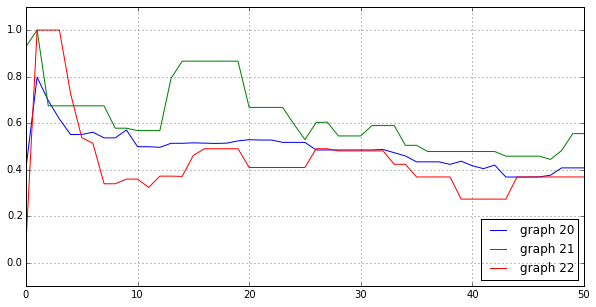

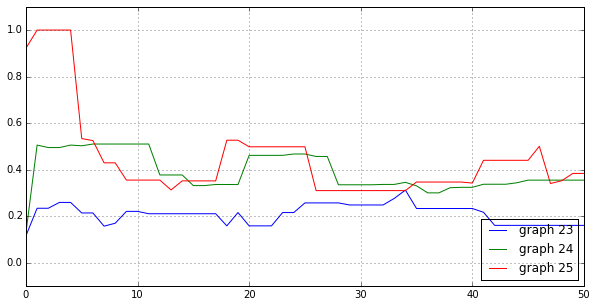

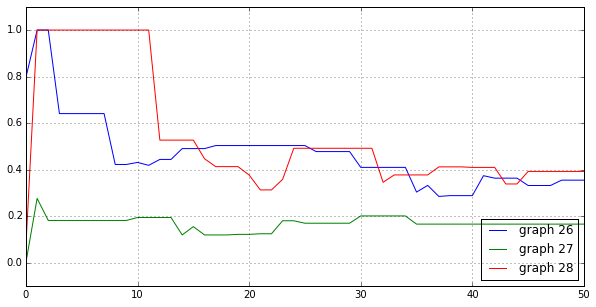

In [1]:
'''
lets see how the distance is developing  while doing the improvement thing
ok distance is just useless oOo
'''
%time
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge
from eden.modifier.graph.vertex_attributes import colorize 
#from sklearn.metrics.pairwise import euclidean_distances as dist
#from sklearn.metrics.pairwise import linear_kernel as dist
from sklearn.metrics.pairwise import cosine_distances as dist
class show_distance(gl.GraphLearnSampler):
    # stop score tracking:
    def _score_list_append(self,graph):
        pass
    #hijack stop condition to save different values
    def _stop_condition(self,graph):
        
        if self.step == 0:
            self.vectorizer._reference_vec = self.vectorizer.transform_single(graph)
        else:    
            x = self.vectorizer.transform_single(graph)
            
            similarity = self.vectorizer._reference_vec.dot(x.T).todense()[0,0]
            #similarity= dist(x, self.vectorizer._reference_vec)
            self._score_list.append(similarity)
            #print similarity

            
            
            
# learn a grammar
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
training_size=50
training_graphs = itertools.islice(training_graphs,training_size)
sampler=show_distance(radius_list=[1,2],thickness_list=[1,2])
#sampler.fit(training_graphs,n_jobs=-1, core_interface_pair_remove_threshold=2, interface_remove_threshold=2)
#sampler.save('tmp/demo.ge')            
                         
#sampler=show_distance()
#sampler=gl.GraphLearnSampler()
sampler.load('tmp/demo.ge')

graphs = gspan_to_eden( 'bursi.pos.gspan' )

id_start=20
id_end=id_start+9

graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50
sampling_interval=int(n_steps/5)+1
graphs = sampler.sample(graphs,
                        same_radius=False,
                        same_core_size=True,
                        sampling_interval=sampling_interval,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        annealing_factor=.5,
                        probabilistic_core_choice=True,
                        burnout=1,
                        select_cip_max_tries=100)

  
scores=[]
for graph in list(graphs):
    scores.append(graph.graph['sampling_info']['score_history'])

from itertools import islice
import numpy as np

step=sampling_interval
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()    
    

In [23]:
import numpy as np 
from itertools import izip
a = np.arange(6).reshape(2,3)
print a

for x,y in izip(range(3),iter(a)):#np.nditer(a, flags=['external_loop'], order='C'):
     print x,y

[[0 1 2]
 [3 4 5]]
0 [0 1 2]
1 [3 4 5]


In [5]:
class Base(object):
    def __init__(self):
        print "Base created"

class ChildA(Base):
    def __init__(self):
        Base.__init__(self)

class ChildB(Base):
    def __init__(self):
        super(ChildB, self).__init__()

ChildA() 
ChildB()

Base created
Base created


In [51]:
from eden.graph import Vectorizer
import networkx as nx


def getpathgraph(labels):
    nlabels= len(labels)
    G=nx.path_graph(nlabels)
    for e in range(nlabels):
        G.node[e]['label']=labels[e]
    for e in range(nlabels-1):
        G.edge[e][e+1]['label']='.'
    return G


from eden.converter.graph.gspan import gspan_to_eden
gr = gspan_to_eden( 'bursi.pos.gspan' )
gr,gr2 =itertools.tee(gr)
v4=Vectorizer(nbits=3)
v3=Vectorizer(nbits=2)
y=v4.transform_single(gr.next())
x=v3.transform_single(gr2.next())





g= getpathgraph('AABBB')
print v3.transform_single(g)
print "asd"
print v4.transform_single(g)



  (0, 1)	0.390360029179
  (0, 2)	0.19518001459
  (0, 3)	0.19518001459
  (0, 4)	0.146385010942
asd
  (0, 1)	0.077151674981
  (0, 2)	0.0737209780774
  (0, 3)	0.231455024943
  (0, 4)	0.231455024943
  (0, 5)	0.077151674981
  (0, 6)	0.213200716356
  (0, 7)	0.0737209780774
  (0, 8)	0.077151674981


In [48]:

import sys
sys.path.append("..")
from graphlearn.graphlearn import GraphLearnSampler
import itertools
import networkx as nx
from sklearn.neighbors import LSHForest
import heapq
from eden.graph import Vectorizer
from graphlearn.utils import draw
import logging
import copy

from eden.util import configure_logging
configure_logging(logging.getLogger(),verbosity=2)


# get graphs
from eden.converter.graph.gspan import gspan_to_eden
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
graphiter = itertools.islice(training_graphs,200)


graphiter = [ g for g in graphiter ]


# get a vectorizer and tee the graphs
vectorizer = Vectorizer(nbits=10)


#get a sampelr
sampler= GraphLearnSampler()
sampler.fit(graphiter)

print sampler.vectorizer.__dict__

# vectorize a few things

X = vectorizer.transform_single(nx.Graph(graphiter[0]))
Y = vectorizer.transform_single(copy.copy(graphiter[1]))   


print sampler.vectorizer.__dict__


# sample a few things
rez=sampler.sample(graphiter[:5],n_samples=5,
                               batch_size=1,
                               n_jobs=0,
                               n_steps=1,
                               select_cip_max_tries=100,
                               accept_annealing_factor=.5,
                               generatormode=False,
                               same_core_size=False )
print [e for e in rez]
        


Classifier:
SGDClassifier(alpha=0.000713515890482, average=False, class_weight=None,
       epsilon=0.1, eta0=0.579223366306, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=86, n_jobs=1,
       penalty='l1', power_t=0.869981432749, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
{'discretization_model_dict': {}, 'nbits': 20, 'd': 6, 'bitmask': 1048575, 'min_n': 2, 'min_r': 0, 'n': 1, 'complexity': 3, 'r': 6, 'min_d': 0, 'feature_size': 1048577, 'label_size': 1, 'normalization': True, 'inner_normalization': True}
{'discretization_model_dict': {}, 'nbits': 20, 'd': 6, 'bitmask': 1048575, 'min_n': 2, 'min_r': 0, 'n': 1, 'complexity': 3, 'r': 6, 'min_d': 0, 'feature_size': 1048577, 'lab

In [49]:

import sys
sys.path.append("..")
from graphlearn.graphlearn import GraphLearnSampler
import itertools
import networkx as nx
from sklearn.neighbors import LSHForest
import heapq
from eden.graph import Vectorizer
from graphlearn.utils import draw
import logging

from eden.util import configure_logging
configure_logging(logging.getLogger(),verbosity=2)



# get graphs
from eden.converter.graph.gspan import gspan_to_eden
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
graphiter = itertools.islice(training_graphs,200)


# get a vectorizer and tee the graphs
vectorizer = Vectorizer(nbits=10)
graphiter,graphiter2,griter2,grait = itertools.tee(graphiter,4)


#get a sampelr
sampler= GraphLearnSampler()
sampler.fit(graphiter2)

print sampler.vectorizer.__dict__

# vectorize a few things
z = griter2.next()
X = vectorizer.transform_single(griter2.next())
Y = vectorizer.transform_single(griter2.next())      


print sampler.vectorizer.__dict__


# sample a few things
grait= itertools.islice(grait,5)
rez=sampler.sample(grait,n_samples=5,
                               batch_size=1,
                               n_jobs=0,
                               n_steps=1,
                               select_cip_max_tries=100,
                               accept_annealing_factor=.5,
                               generatormode=False,
                               same_core_size=False )
print [e for e in rez]


Classifier:
SGDClassifier(alpha=0.000540320714507, average=False, class_weight=None,
       epsilon=0.1, eta0=0.269655177777, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=28, n_jobs=1,
       penalty='l1', power_t=0.337332058382, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
{'discretization_model_dict': {}, 'nbits': 20, 'd': 6, 'bitmask': 1048575, 'min_n': 2, 'min_r': 0, 'n': 1, 'complexity': 3, 'r': 6, 'min_d': 0, 'feature_size': 1048577, 'label_size': 1, 'normalization': True, 'inner_normalization': True}
{'discretization_model_dict': {}, 'nbits': 20, 'd': 6, 'bitmask': 1048575, 'min_n': 2, 'min_r': 0, 'n': 1, 'complexity': 3, 'r': 6, 'min_d': 0, 'feature_size': 1048577, 'lab